# Abalone Data Set

### We will be predicting the age of an abalone (number of rings).


## Data Clean-Up

### We begin by loading the data and creating a dummy variable for the sex of the abalone. 

In [805]:
import numpy as np
import sklearn
import os
import pandas as pd
import matplotlib.pyplot as plt

cwd = os.getcwd()

ABALONE_PATH = os.path.join(cwd, "abalone.data")


def load_abalone_data(abalone_path = ABALONE_PATH):
    return pd.read_csv(ABALONE_PATH,  delimiter = ',', 
                       names = ['sex', 
                                'length', 
                                'diameter', 
                                'height', 
                                'whole_weight', 
                                'shucked_weight',
                                'viscera_weight', 
                                'shell_weight', 
                                'rings'])

data = load_abalone_data()

def create_dummy(data, column):
    dummy = pd.get_dummies(data[column])
    new_data = pd.concat([data, dummy], axis=1)
    return new_data

data = create_dummy(data, "sex")
data = data.drop("sex", axis=1)
data = data.drop("I", axis=1)
data.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,F,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,0


In [806]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
length            4177 non-null float64
diameter          4177 non-null float64
height            4177 non-null float64
whole_weight      4177 non-null float64
shucked_weight    4177 non-null float64
viscera_weight    4177 non-null float64
shell_weight      4177 non-null float64
rings             4177 non-null int64
F                 4177 non-null uint8
M                 4177 non-null uint8
dtypes: float64(7), int64(1), uint8(2)
memory usage: 269.3 KB


In [807]:
data.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,F,M
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,0.312904,0.365813
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,0.463731,0.481715
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,0.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,1.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,1.000000,1.000000


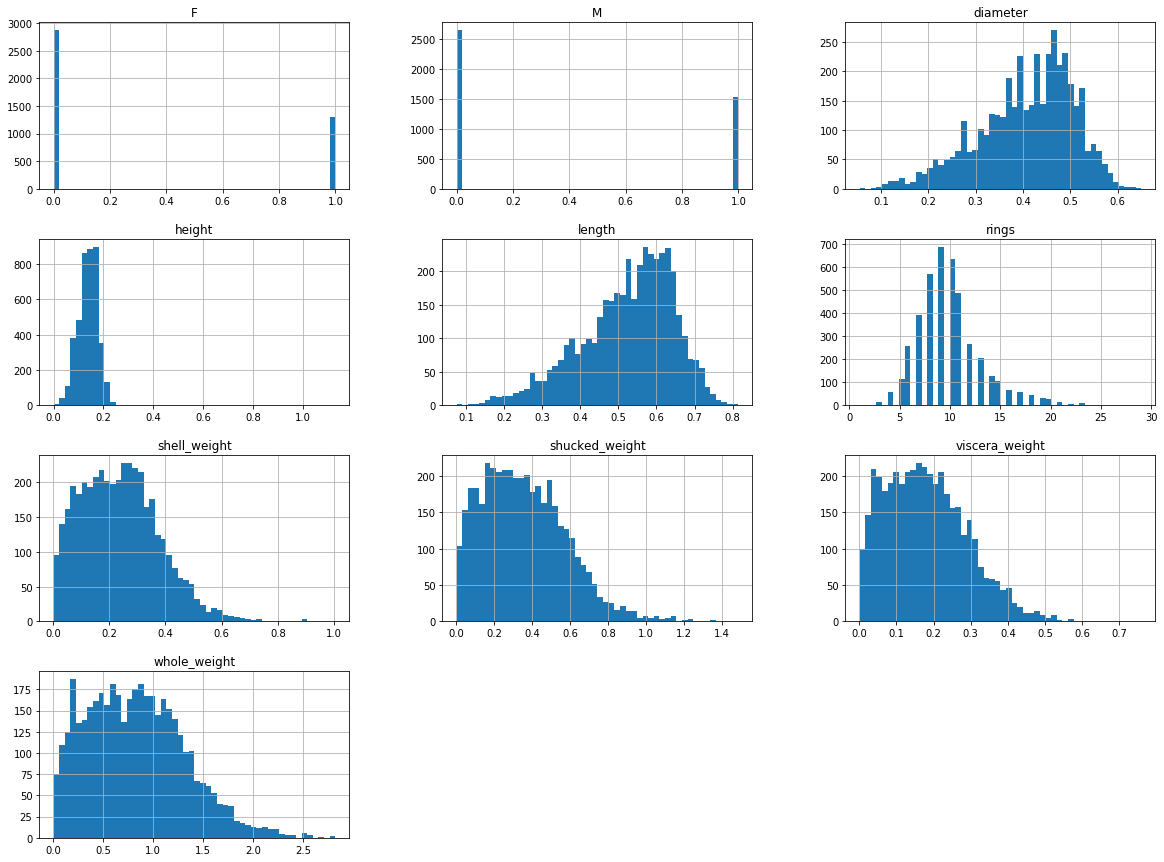

In [808]:
data.hist(bins=50, figsize=(20,15))
plt.show()

#### From the histograms and data description table above, we can see that there are some outliers in height, shell_weight, shucked_weight, and viscera_weight. Let's take a closer look at those and remove some outliers

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,F,M
count,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000
mean,0.523891,0.407789,0.139176,0.827811,0.358915,0.180382,0.238529,9.933094,0.312710,0.365947
std,0.119951,0.099111,0.038276,0.488681,0.221096,0.109128,0.138816,3.224633,0.463653,0.481753
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441625,0.186000,0.093500,0.130000,8.000000,0.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.170750,0.233500,9.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.152500,0.501500,0.252500,0.327875,11.000000,1.000000,1.000000
max,0.800000,0.630000,0.240000,2.825500,1.488000,0.641500,1.005000,29.000000,1.000000,1.000000


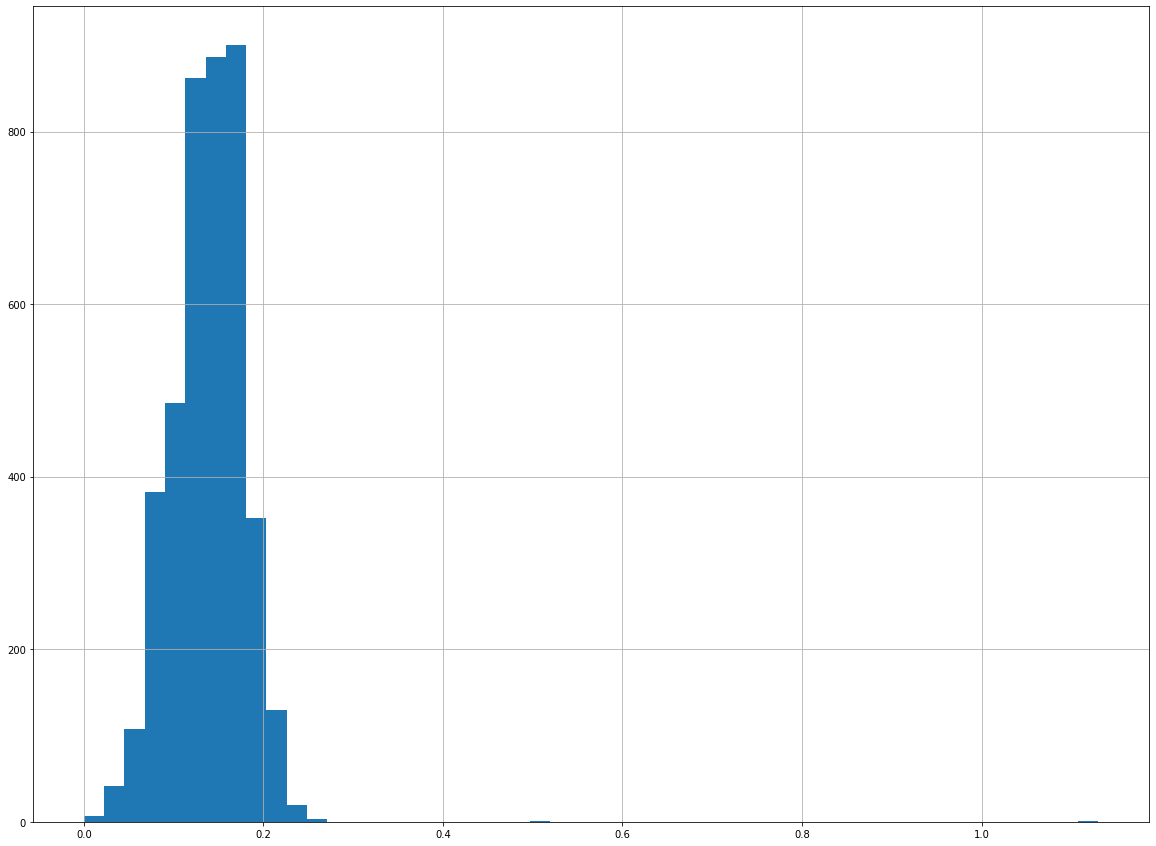

In [809]:
data["height"].hist(bins=50, figsize=(20,15))
data = data[data.height < 0.25]
data = data[data.height > 0]
data.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,F,M
count,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000
mean,0.523891,0.407789,0.139176,0.827811,0.358915,0.180382,0.238529,9.933094,0.312710,0.365947
std,0.119951,0.099111,0.038276,0.488681,0.221096,0.109128,0.138816,3.224633,0.463653,0.481753
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441625,0.186000,0.093500,0.130000,8.000000,0.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.170750,0.233500,9.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.152500,0.501500,0.252500,0.327875,11.000000,1.000000,1.000000
max,0.800000,0.630000,0.240000,2.825500,1.488000,0.641500,1.005000,29.000000,1.000000,1.000000


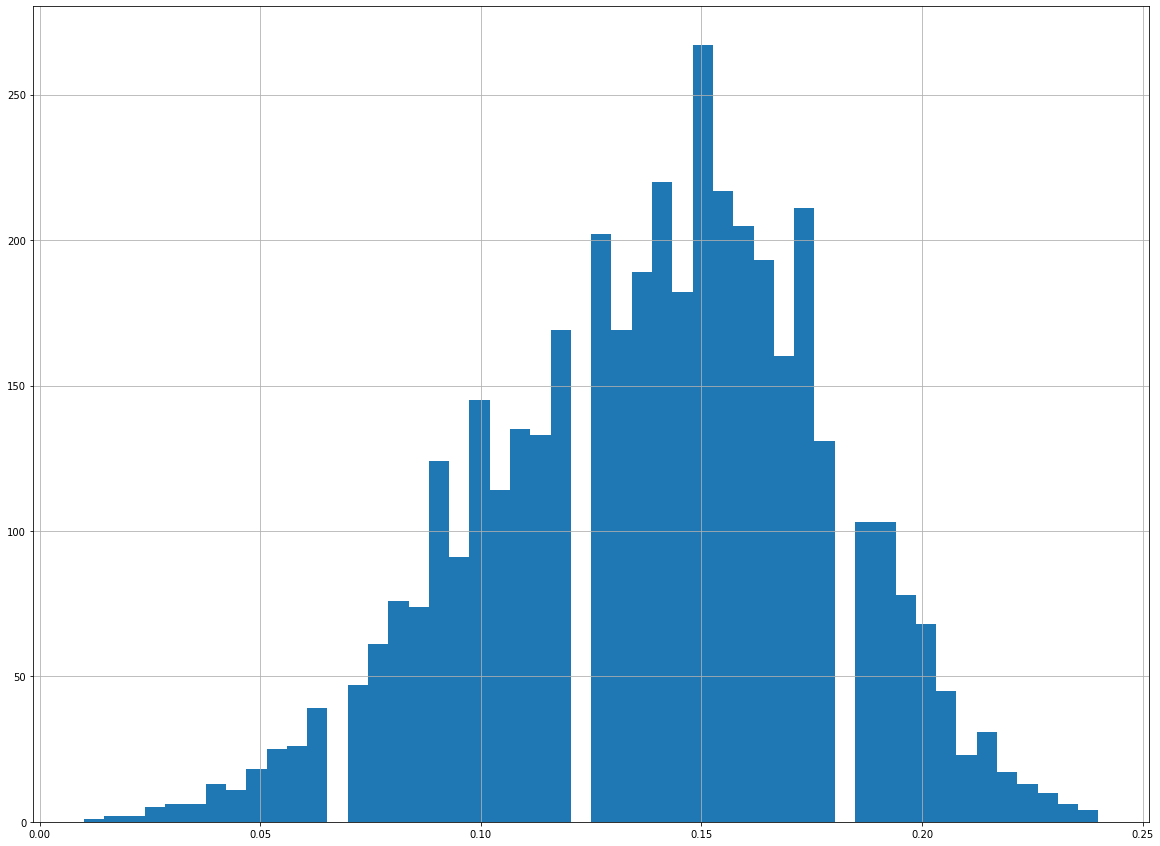

In [810]:
data["height"].hist(bins=50, figsize=(20,15))
data = data[data.height < 0.25]
data = data[data.height > 0]
data.describe()

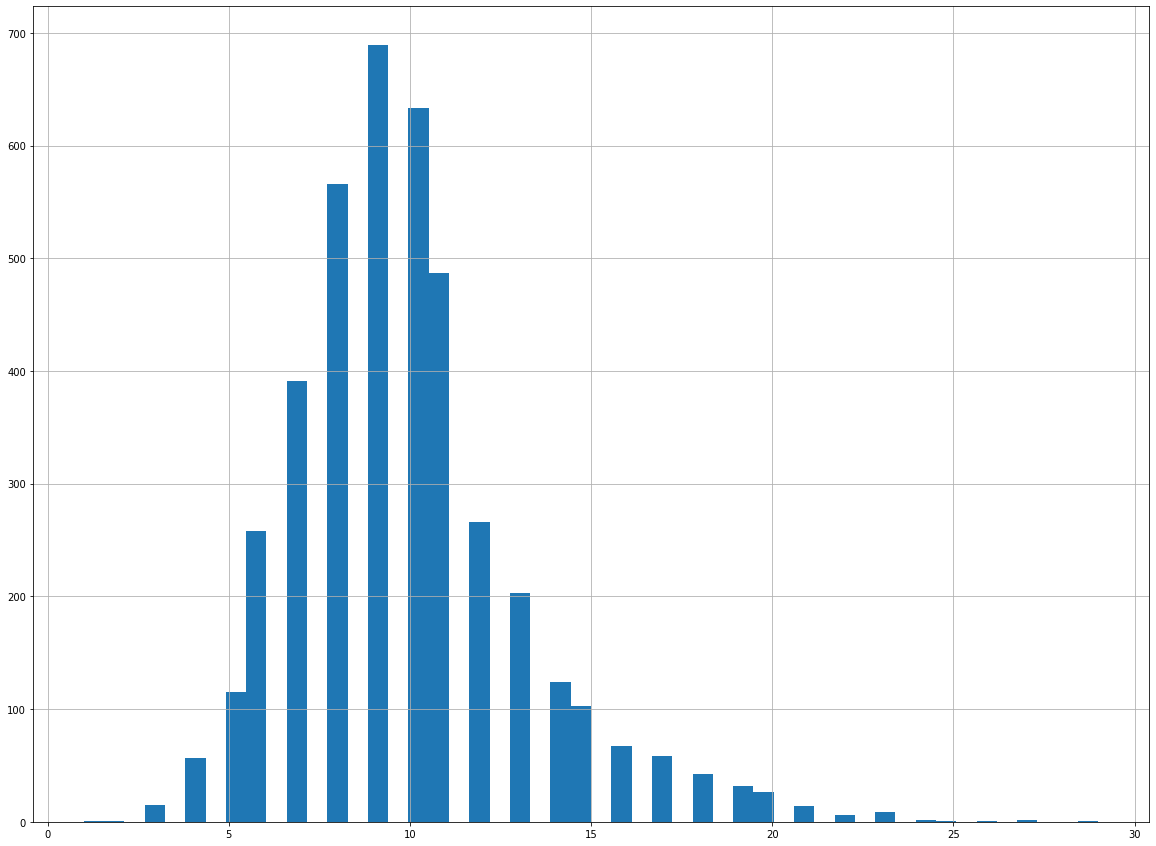

In [811]:
data["rings"].hist(bins=50, figsize=(20,15))

In [812]:
data = data[data.rings < 15]
data = data[data.rings > 5]
data.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,F,M
count,3617.000000,3617.000000,3617.00000,3617.00000,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000
mean,0.531075,0.413091,0.14009,0.83281,0.367798,0.182583,0.235848,9.474150,0.314349,0.370196
std,0.107510,0.088718,0.03442,0.46731,0.218359,0.105732,0.125989,2.034128,0.464320,0.482924
min,0.170000,0.125000,0.01500,0.02350,0.009000,0.005500,0.008000,6.000000,0.000000,0.000000
25%,0.455000,0.350000,0.11500,0.45800,0.194500,0.098000,0.135000,8.000000,0.000000,0.000000
50%,0.545000,0.425000,0.14000,0.79350,0.339500,0.171000,0.228500,9.000000,0.000000,0.000000
75%,0.615000,0.480000,0.16500,1.14200,0.506500,0.251500,0.319000,11.000000,1.000000,1.000000
max,0.780000,0.630000,0.24000,2.65700,1.488000,0.641500,0.760000,14.000000,1.000000,1.000000


## Data Correlation

### From the correlation matrix below, we can see that all attributes except for female or male have a relatively positive correlation with age (rings). 

In [813]:
corr_matrix = data.corr()
corr_matrix["rings"].sort_values(ascending=False)

rings             1.000000
shell_weight      0.599205
height            0.582969
diameter          0.568816
length            0.551948
whole_weight      0.537476
viscera_weight    0.525171
shucked_weight    0.453135
F                 0.251193
M                 0.194283
Name: rings, dtype: float64

### With the scatter matrix below, we can see that generally, there is generally a slightly non-linear (more logistic) relationship between the weight attributes (whole_weight, shucked_weight, viscera_weight, shell_weigh) and age (ring number). Length and diameter also have a slightly non-linear relationship. From this, we can predict that a logistic regression will better predict abalone age (number of rings) compared to a linear regression.

### We can also see from the correlation matrix that the sex of the abalone is a poor indicator of the number of rings (age). Thus, we will drop this from our regression

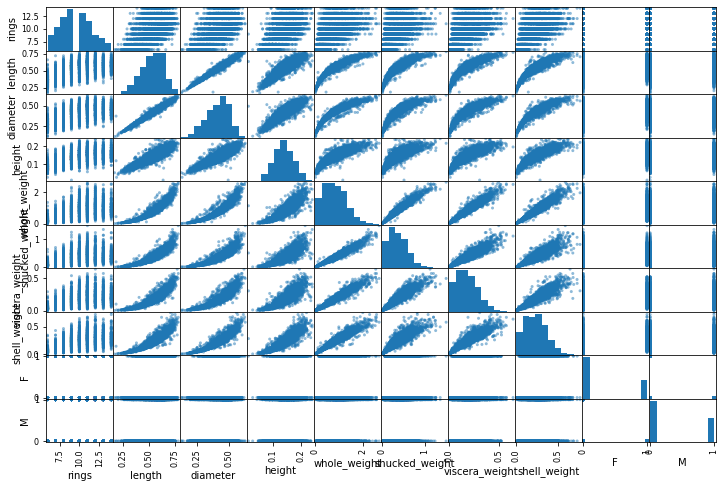

In [814]:
from pandas.plotting import scatter_matrix

attributes = ['rings',
              'length', 
              'diameter', 
              'height', 
              'whole_weight', 
              'shucked_weight',
              'viscera_weight', 
              'shell_weight', 
              'F', 
              'M']
matrix = scatter_matrix(data[attributes], figsize=(12, 8))


In [815]:
data = data.drop("M", axis=1)
data = data.drop("F", axis=1)
data.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


#### Looking at the first row, we can see that generally, there is generally a logistic relationship between the attributes (whole_weight, shucked_weight, viscera_weight, shell_weigh, length, diameter) and rings. We can also see from the correlation matrix that the sex of the abalone is a poor indicator of the number of rings (age). Thus, we will drop this from our regression.

In [816]:
from sklearn.model_selection import train_test_split

data_y = data["rings"]
data_x = data.drop(columns=['rings'])
data_x_mod = data.drop(columns=['rings', 'viscera_weight', 'shucked_weight'])

data_x = data_x.to_numpy()
data_x_mod = data_x_mod.to_numpy()
data_y = data_y.to_numpy()

train_x, test_x,  train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, random_state=30)
train_x_mod, test_x_mod,  train_y_mod, test_y_mod = train_test_split(data_x_mod, data_y, test_size=0.2, random_state=30)



In [817]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

process = StandardScaler()

train_x = process.fit_transform(train_x)
train_x_mod = process.fit_transform(train_x_mod)


In [818]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_x, train_y)

from sklearn.metrics import mean_squared_error
pred_lin = lin_reg.predict(test_x)

lin_mse = mean_squared_error(test_y, pred_lin)
lin_rmse = np.sqrt(lin_mse)

print("Test mse is {}, rmse is {}".format(lin_mse, lin_rmse))



Test mse is 4.119568702996569, rmse is 2.0296720678465694


In [819]:
lin_reg_mod = LinearRegression()
lin_reg_mod.fit(train_x_mod, train_y_mod)

pred_lin_mod = lin_reg_mod.predict(test_x_mod)

lin_mse_mod = mean_squared_error(test_y_mod, pred_lin_mod)
lin_rmse_mod = np.sqrt(lin_mse_mod)

print("Test mse is {}, rmse is {}".format(lin_mse_mod, lin_rmse_mod))


Test mse is 5.08492011983432, rmse is 2.2549767448544387


In [820]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(train_set_x, train_set_y)

/Users/gp/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gp/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [821]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(train_x, train_y)

pred_log = log_reg.predict(test_x)

log_mse = mean_squared_error(test_y, pred_log)
log_rmse = np.sqrt(lin_mse)

print("Test mse is {}, rmse is {}".format(log_mse, log_rmse))



Test mse is 3.834254143646409, rmse is 2.0296720678465694


/Users/gp/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gp/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [822]:
log_reg_mod = LogisticRegression()
log_reg_mod.fit(train_x_mod, train_y_mod)

pred_log_mod = log_reg_mod.predict(test_x_mod)

log_mse_mod = mean_squared_error(test_y_mod, pred_log_mod)
log_rmse_mod = np.sqrt(log_mse_mod)

print("Test mse is {}, rmse is {}".format(log_mse_mod, log_rmse_mod))

Test mse is 3.6740331491712706, rmse is 1.9167767603900228


/Users/gp/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gp/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.17541436464088397
0.23342541436464087
-0.04272693774188996


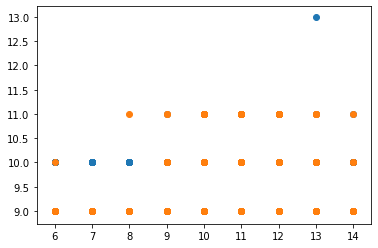

In [823]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
plt.scatter(test_y, pred_log)
plt.scatter(test_y, pred_log_mod)

print(log_reg.score(test_x, test_y))
print(log_reg_mod.score(test_x_mod, test_y))
print(lin_reg.score(test_x, test_y))


0.13746686588049573


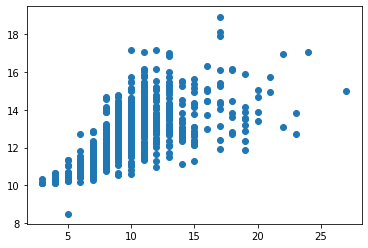

In [824]:
plt.scatter(test_set_y, test_pred_lin)

print(lin_reg.score(test_set_x, test_set_y))

/Users/gp/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        17
           5       0.00      0.00      0.00        28
           6       0.00      0.00      0.00        56
           7       0.00      0.00      0.00        75
           8       0.00      0.00      0.00       129
           9       0.03      0.03      0.03       135
          10       0.17      0.85      0.28       120
          11       0.50      0.02      0.04        86
          12       0.00      0.00      0.00        45
          13       0.14      0.24      0.18        49
          14       0.00      0.00      0.00        22
          15       0.00      0.00      0.00        22
          16       0.00      0.00      0.00         7
          17       0.00      0.00      0.00        12
          18       0.00      0.00      0.00         7
          19       0.00      0.00      0.00         9
          20       0.00    

In [832]:
print(test_set_y)
print(pred_log)
print(pred_lin)

[ 6  9  9 12 10  7  8  9 10  4  4 10 12  8  8  7 10  4 11  8 17 12 11  5
  9 10  9 10  3  8 10  6 11 10  9 11  9  8 12  8  8 12 10  8 11  4 11 11
  6  9 20  6  6  8  9  9  7 11  8 13  9 11  5  8 11  6  5 13 11 13  9  6
 11 15  6 10  7  8  6 12 15  9 10  9  7  7  5 13 13 13  8 11 11 10  9  7
 13 11  8  8 16 13 10  7  6 13  6 10 13  8 11  8 11  9 11 10  4  7 11 19
  8 12 14  9 18 12 10  5 13 10  9 12  7 15 11 14  7  9 13 14  9  8 10 14
  8 10  8  6  8  6  9 10 12 12  9  7  8 11 10  8  6  8  4  8 13  7  8  9
  9  9  7 12  8  7  9  8 12  4 13 10 12  5 12 10  8  9  9  4 18 13 10  7
 14 12 10 10  6  7 11 11 15  8  9 11 12  8 19  7  5 10  9 13 19 13  8  6
  7 11  6 11  9  4  6 13  9  9  5 12  9  8 10 10 10  7  8  7 11  8  5 13
  9  8  8  9  9  9  9 17  7  7  9  9  9 10 10  5  7  3 10 13 14 21 18  3
 12 10 13 16 10  7 10 19  8 10  9  7 11  9  8  7 21  8  9  9 11  6 11  9
  6 17  9 11  9  7 11 19  9  8  8 11 11  9  9 19  9  8  5  9  9  9  6  8
 15 12  8 12  9 11  8 11  9 10 10  5  6 10  9  4 10